In [1]:
from IPython.core.debugger import set_trace

In [2]:
pwd = !pwd
pwd = pwd[0]

# Absolute path to default Hydra config for normalization script
config_path = '/'.join(pwd.split('/')[:-1]) + '/examples/configs/normalization/fit/default.yaml'

# Absolute path to saved train and eval managers
EVAL_MAN_PATHS = {
  'CoQA': pwd + '/polygraph_tacl_stablelm12b_coqa.man',
  'GSM8K': pwd + '/polygraph_tacl_stablelm12b_gsm8k.man',
  'MMLU': pwd + '/polygraph_tacl_stablelm12b_mmlu.man',
  'TriviaQA': pwd + '/polygraph_tacl_stablelm12b_triviaqa.man',
  'WMT14': pwd + '/polygraph_tacl_stablelm12b_wmt14.man',
  'WMT19': pwd + '/polygraph_tacl_stablelm12b_wmt19.man',
  'XSum': pwd + '/polygraph_tacl_stablelm12b_xsum.man',
}

TRAIN_MAN_PATHS = {
  'CoQA': pwd + '/polygraph_tacl_stablelm12b_coqa_train.man',
  'GSM8K': pwd + '/polygraph_tacl_stablelm12b_gsm8k_train.man',
  'MMLU': pwd + '/polygraph_tacl_stablelm12b_mmlu_train.man',
  'TriviaQA': pwd + '/polygraph_tacl_stablelm12b_triviaqa_train.man',
  'WMT14': pwd + '/polygraph_tacl_stablelm12b_wmt14_train.man',
  'WMT19': pwd + '/polygraph_tacl_stablelm12b_wmt19_train.man',
  'XSum': pwd + '/polygraph_tacl_stablelm12b_xsum_train.man',
}

DATASET_NAMES = list(TRAIN_MAN_PATHS.keys())

UE_METHOD_NAMES = [
    'MaximumSequenceProbability',
    'Perplexity',
    'MeanTokenEntropy',
    'MonteCarloSequenceEntropy',
    'MonteCarloNormalizedSequenceEntropy',
    'MeanPointwiseMutualInformation',
    'RenyiNeg',
    'FisherRao',
    'TokenSAR',
    'CCP',
    'SemanticEntropy',
    'SentenceSAR',
    'SAR',
    'PTrue',
    'NumSemSets',
    'EigValLaplacian_NLI_score_entail',
    'EigValLaplacian_NLI_score_contra',
    'EigValLaplacian_Jaccard_score',
    'DegMat_NLI_score_entail',
    'DegMat_NLI_score_contra',
    'DegMat_Jaccard_score',
    'Eccentricity_NLI_score_entail',
    'Eccentricity_NLI_score_contra',
    'Eccentricity_Jaccard_score',
    'LexicalSimilarity_rouge1',
    'LexicalSimilarity_rouge2',
    'LexicalSimilarity_rougeL',
]

UE_METHOD_NAMES_ABBR = {
    'MaximumSequenceProbability': 'MSP',
    'Perplexity': 'PPL',
    'MeanTokenEntropy': 'MTE',
    'MonteCarloSequenceEntropy': 'MCSE',
    'MonteCarloNormalizedSequenceEntropy': 'MCNSE',
    'MeanPointwiseMutualInformation': 'MPMI',
    'RenyiNeg': 'RenyiNeg',
    'FisherRao': 'FisherRao',
    'TokenSAR': 'TokenSAR',
    'CCP': 'CCP',
    'SemanticEntropy': 'SE',
    'SentenceSAR': 'SentenceSAR',
    'SAR': 'SAR',
    'PTrue': 'PTrue',
    'NumSemSets': 'NumSemSets',
    'EigValLaplacian_NLI_score_entail': 'EVL_entail',
    'EigValLaplacian_NLI_score_contra': 'EVL_contra',
    'EigValLaplacian_Jaccard_score': 'EVL_Jaccard',
    'DegMat_NLI_score_entail': 'DegMat_entail',
    'DegMat_NLI_score_contra': 'DegMat_contra',
    'DegMat_Jaccard_score': 'DegMat_Jaccard',
    'Eccentricity_NLI_score_entail': 'Eccentricity_entail',
    'Eccentricity_NLI_score_contra': 'Eccentricity_contra',
    'Eccentricity_Jaccard_score': 'Eccentricity_Jaccard',
    'LexicalSimilarity_rouge1': 'LS_rouge1',
    'LexicalSimilarity_rouge2': 'LS_rouge2',
    'LexicalSimilarity_rougeL': 'LS_rougeL',
}

GEN_METRIC_NAMES = ['AlignScore']

In [3]:
# Download all managers to current directory
#!wget -r --cut-dirs=2 -nH --no-parent -A '*man' http://209.38.249.180:8000/polygraph_data/mans/

In [4]:
def get_man_paths_list(man_paths):
    """ Formats a list of paths so it can be passed as a parameter override to hydra script call"""
    paths = ['"' + path + '"' for path in man_paths]
    paths = '\'[' + ','.join(paths) + ']\''

    return paths

In [5]:
import os

# Run polygraph_normalize to fit all normalizers using all train datasets
train_man_paths = get_man_paths_list(list(TRAIN_MAN_PATHS.values()))
os.system(f'HYDRA_CONFIG={config_path} polygraph_normalize save_path="./" man_paths={train_man_paths}')

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29f0e61a0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29f0e6080>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29f0f8cd0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x102f82890>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29efecd90>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29efee410>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29f0940a0>]


0

In [6]:
import pickle

# Load saved fitted normalizers
with open('fitted_normalizers.json', 'rb') as f:
    fitted_normalizers = pickle.load(f)

In [7]:
import numpy as np
from collections import defaultdict
from lm_polygraph.normalizers.minmax import MinMaxNormalizer
from lm_polygraph.normalizers.quantile import QuantileNormalizer
from lm_polygraph.normalizers.binned_pcc import BinnedPCCNormalizer
from lm_polygraph.normalizers.isotonic_pcc import IsotonicPCCNormalizer

NORMALIZERS = {
    'min_max': MinMaxNormalizer,
    'quantile': QuantileNormalizer,
    'binned_pcc': BinnedPCCNormalizer,
    'isotonic_pcc': IsotonicPCCNormalizer
}

def get_confidences(normalizers, ues):
    """ For each combination of method, gen metric and normalizer type
    load normalizer from encoded string and use it to transform UE array """
    
    confidences = {'min_max': defaultdict(dict),
                   'quantile': defaultdict(dict),
                   'binned_pcc': defaultdict(dict),
                   'isotonic_pcc': defaultdict(dict)}
    
    for key in confidences.keys():
        for method_name in UE_METHOD_NAMES:
            for metric_name in GEN_METRIC_NAMES:
                normalizer = NORMALIZERS[key].loads(normalizers[(metric_name, method_name, key)])
                normalized = normalizer.transform(ues[method_name])
                confidences[key][metric_name][method_name] = normalized

    return confidences

def calculate_mses(confidences, gen_metrics, ues):
    """ Given a list of confidences and gen metrics calculates MSE between them
    for each combination of method, metric and normalizer type"""
    
    mses = {'min_max': defaultdict(dict),
            'quantile': defaultdict(dict),
            'binned_pcc': defaultdict(dict),
            'isotonic_pcc': defaultdict(dict)}
    
    for key in confidences.keys():
        for metric_name in GEN_METRIC_NAMES:
            metric_mses = []
            for method_name in UE_METHOD_NAMES:
                gt_metric = gen_metrics[metric_name]
                try:
                    mse = ((confidences[key][metric_name][method_name] - gt_metric) ** 2).mean()
                except:
                    set_trace()
                    pass
                metric_mses.append(mse)
            mses[key][metric_name] = metric_mses

    return mses

/opt/homebrew/Caskroom/miniconda/base/envs/ue_abssum/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### All datasets

In [8]:
from lm_polygraph.utils.normalize import get_mans_ues_metrics

# Load and concatenate all UE values and metrics for all test datasets
ues, gen_metrics = get_mans_ues_metrics(EVAL_MAN_PATHS.values(), UE_METHOD_NAMES, GEN_METRIC_NAMES)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x10686f190>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a5507e20>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a5530910>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a5530f40>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a5531570>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a5531b40>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a5532170>]


In [9]:
confidences = get_confidences(fitted_normalizers, ues)
mses = calculate_mses(confidences, gen_metrics, ues)

In [10]:
def plot_mses(ax, mses, title):
    ax.bar(x-0.3, mses['min_max']['AlignScore'], width=0.2, color='g', align='center', label='Linear')
    ax.bar(x-0.1, mses['quantile']['AlignScore'], width=0.2, color='b', align='center', label='Quantile')
    ax.bar(x+0.1, mses['binned_pcc']['AlignScore'], width=0.2, color='tab:olive', align='center', label='Binned')
    ax.bar(x+0.3, mses['isotonic_pcc']['AlignScore'], width=0.2, color='r', align='center', label='Isotonic')

    ax.set_xticks(range(len(UE_METHOD_NAMES)), list(UE_METHOD_NAMES_ABBR.values()), rotation=90, fontsize=14)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('MSE', fontsize=18)
    ax.legend()

In [11]:
import matplotlib.pyplot as plt

x = np.array(list(range(len(UE_METHOD_NAMES))))

f, ax = plt.subplots(1, 1, figsize=(9, 7))

plot_mses(ax, mses, 'MSE between AlignScore and confidence')

# handles, labels = ax.get_legend_handles_labels()
# f.legend(handles, labels, bbox_to_anchor=(1.15, 0.96), fontsize=12)

plt.tight_layout()
# Change this to plt.show() to display inline
plt.savefig(f'normalization_mse_total.pdf', bbox_inches='tight')
# plt.show()
plt.clf()

<Figure size 900x700 with 0 Axes>

### OOD Datasets

In [12]:
ood_confidences = {}
ood_mses = {}

for dataset_name in DATASET_NAMES:
    # Fit normalizers excluding current OOD dataset from train set
    train_man_paths_wo_dataset = [value for key, value in TRAIN_MAN_PATHS.items() if key != dataset_name]
    train_man_paths_wo_dataset = get_man_paths_list(train_man_paths_wo_dataset)
    os.system(f'HYDRA_CONFIG={config_path} polygraph_normalize save_path="./ood_{dataset_name}" man_paths={train_man_paths_wo_dataset}')

    # Get UE and metric values for OOD dataset
    ood_ues, ood_gen_metrics = get_mans_ues_metrics([EVAL_MAN_PATHS[dataset_name]], UE_METHOD_NAMES, GEN_METRIC_NAMES)

    with open(f'./ood_{dataset_name}/fitted_normalizers.json', 'rb') as f:
        fitted_normalizers = pickle.load(f)

    ood_confidences[dataset_name] = get_confidences(fitted_normalizers, ood_ues)
    ood_mses[dataset_name] = calculate_mses(ood_confidences[dataset_name], ood_gen_metrics, ood_ues)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a14e5f00>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a14e5ea0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a1364700>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a149c8b0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a149d030>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a149de70>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a990dae0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29dce5d80>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x29dce5960>]
Stat calculators: [

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# If number of datasets is not even, we display an even part in pairs, and then last one separately
is_even = (len(DATASET_NAMES) % 2 == 0)
even_datasets_subset = DATASET_NAMES if is_even else DATASET_NAMES[:-1]
dataset_pairs = [even_datasets_subset[i:i + 2] for i in range(0, len(even_datasets_subset), 2)]

x = np.array(list(range(len(UE_METHOD_NAMES))))

for dataset_pair in dataset_pairs:
    fig = plt.figure(figsize=(18, 5))
    gs = GridSpec(1, 2, figure=fig)

    for i, dataset_name in enumerate(dataset_pair):
        ax = fig.add_subplot(gs[i//2,i%2])
        plot_mses(ax, ood_mses[dataset_name], f'MSE between true AlignScore and confidence: {dataset_name}')
        handles, labels = ax.get_legend_handles_labels()
    
    plt.tight_layout()
    # Change this to plt.show() to display inline
    plt.savefig(f'normalization_mse_ood_{"_".join(dataset_pair).lower()}.pdf')
    # plt.show()
    plt.clf()

if not is_even:
    dataset_name = DATASET_NAMES[-1]
    
    fig = plt.figure(figsize=(9, 5))
    gs = GridSpec(1, 1, figure=fig)

    ax = fig.add_subplot(gs[0,0])

    plot_mses(ax, ood_mses[dataset_name], f'MSE between true AlignScore and confidence: {dataset_name}')
    
    plt.tight_layout()
    # Change this to plt.show() to display inline
    plt.savefig(f'normalization_mse_ood_{dataset_name.lower()}.pdf')
    # plt.show()
    plt.clf()

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

### PRR change relative to raw uncertainty

In [14]:
from lm_polygraph.utils.normalize import filter_nans
from lm_polygraph.ue_metrics.pred_rej_area import PredictionRejectionArea
from lm_polygraph.ue_metrics.ue_metric import (
    get_random_scores,
    normalize_metric,
)
import pandas as pd

ue_metric = PredictionRejectionArea()

cols = ['MinMax', 'Quantile', 'Binned PCC', 'Isotonic PCC']

# For each of the dataset we take all confidences calculated in OOD setting
# and compare PRR of this to raw unnormalized UE
for dataset_name, path in EVAL_MAN_PATHS.items():
    res = {}
    all_ues, all_gen_metrics = get_mans_ues_metrics([path], UE_METHOD_NAMES, GEN_METRIC_NAMES)
    train_man_paths_wo_dataset = [value for key, value in TRAIN_MAN_PATHS.items() if key != dataset_name]
    train_ues, train_gen_metrics = get_mans_ues_metrics(train_man_paths_wo_dataset, UE_METHOD_NAMES, GEN_METRIC_NAMES)

    for metric_name in GEN_METRIC_NAMES:
        gen_metrics = all_gen_metrics[metric_name]
        for ue_method_name in UE_METHOD_NAMES:
            ues = all_ues[ue_method_name]
            
            filtered_metric, filtered_ues = filter_nans(gen_metrics, ues)
            
            # -np.array() because we need to use UE, not confidence to calculate PRR
            minmax_ues = -np.array(ood_confidences[dataset_name]['min_max'][metric_name][ue_method_name])
            quantile_ues = -np.array(ood_confidences[dataset_name]['quantile'][metric_name][ue_method_name])
            binned_pcc_ues = -np.array(ood_confidences[dataset_name]['binned_pcc'][metric_name][ue_method_name])
            isotonic_pcc_ues = -np.array(ood_confidences[dataset_name]['isotonic_pcc'][metric_name][ue_method_name])
            
            oracle_score = ue_metric(-filtered_metric, filtered_metric)
            random_score = get_random_scores(ue_metric, filtered_metric)

            raw_ue_metric_val = ue_metric(filtered_ues, filtered_metric)
            raw_score = normalize_metric(raw_ue_metric_val, oracle_score, random_score)

            minmax_ue_metric_val = ue_metric(minmax_ues, filtered_metric)
            minmax_score = normalize_metric(minmax_ue_metric_val, oracle_score, random_score)
            minmax_diff = raw_score - minmax_score

            quantile_ue_metric_val = ue_metric(quantile_ues, filtered_metric)
            quantile_score = normalize_metric(quantile_ue_metric_val, oracle_score, random_score)
            quantile_diff = raw_score - quantile_score
            
            binned_pcc_ue_metric_val = ue_metric(binned_pcc_ues, filtered_metric)
            binned_pcc_score = normalize_metric(binned_pcc_ue_metric_val, oracle_score, random_score)
            binned_pcc_diff = raw_score - binned_pcc_score

            isotonic_pcc_ue_metric_val = ue_metric(isotonic_pcc_ues, filtered_metric)
            isotonic_pcc_score = normalize_metric(isotonic_pcc_ue_metric_val, oracle_score, random_score)
            isotonic_pcc_diff = raw_score - isotonic_pcc_score

            res[ue_method_name] = [minmax_diff, quantile_diff, binned_pcc_diff, isotonic_pcc_diff]

    # Show table for each datasets that contains difference between raw UE PRR and PRR based on normalized confidence
    # Lower is better, negative is best (means normalized confidence improves upon raw PRR
    df = pd.DataFrame.from_dict(res, orient='index', columns=cols)
    display(df)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3e260>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2ae4f4460>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2ae4f5fc0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fe140>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1062603d0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eedcf0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6f226e0>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,0.000000,3.027419e-05,0.045624,0.000520
Perplexity,0.000054,6.973301e-05,0.017120,0.001801
MeanTokenEntropy,0.000000,8.562246e-05,0.071875,0.000000
MonteCarloSequenceEntropy,0.000000,6.969507e-05,0.072111,0.003679
MonteCarloNormalizedSequenceEntropy,0.000043,7.251505e-06,0.026097,0.000252
MeanPointwiseMutualInformation,0.000000,-1.521409e-05,0.023563,0.000000
RenyiNeg,0.000000,-2.396752e-04,0.001152,0.000000
FisherRao,0.000000,-2.710695e-04,-0.032335,0.000000
TokenSAR,0.000000,-1.308053e-05,0.027570,0.000000
CCP,0.000000,6.074188e-05,0.053289,0.000000


Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1062603d0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fe140>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9956230>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9dec0a0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3ed10>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3d900>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eecee0>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,0.000000,0.000022,-0.014490,0.000000e+00
Perplexity,0.000000,0.000035,0.077725,0.000000e+00
MeanTokenEntropy,0.000000,0.000088,0.051275,0.000000e+00
MonteCarloSequenceEntropy,0.000199,0.000205,0.100969,9.118947e-02
MonteCarloNormalizedSequenceEntropy,0.000000,-0.000130,0.026921,0.000000e+00
MeanPointwiseMutualInformation,0.000000,0.000218,0.372224,0.000000e+00
RenyiNeg,0.000000,-0.000260,-0.157606,0.000000e+00
FisherRao,0.000000,-0.000083,-0.073898,-6.717210e-03
TokenSAR,0.000000,0.000009,0.079779,0.000000e+00
CCP,0.000000,-0.000027,0.012593,0.000000e+00


Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fd270>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x106298880>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eec610>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db8940>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db8f70>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6dbbd60>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9955c30>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,0.000000,2.871689e-05,0.034351,0.000000e+00
Perplexity,0.000000,-7.757970e-06,0.076598,0.000000e+00
MeanTokenEntropy,0.000000,4.218778e-05,-0.078761,0.000000e+00
MonteCarloSequenceEntropy,0.000000,1.287856e-05,0.018792,0.000000e+00
MonteCarloNormalizedSequenceEntropy,0.000000,6.304778e-07,0.071458,0.000000e+00
MeanPointwiseMutualInformation,0.000000,2.981897e-05,0.171447,2.737807e-04
RenyiNeg,0.042275,2.259064e-02,0.383408,3.057858e-01
FisherRao,0.054812,4.174128e-02,0.364305,2.874385e-01
TokenSAR,0.000000,-1.901745e-05,0.137471,0.000000e+00
CCP,0.000000,3.640882e-04,-0.003296,0.000000e+00


Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x106260250>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fe110>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9956170>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6f21030>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6f20b50>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6f22950>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db84c0>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,-1.436972e-05,0.000125,0.076625,0.000433
Perplexity,0.000000e+00,-0.000021,0.032847,0.000105
MeanTokenEntropy,0.000000e+00,-0.000025,0.210053,-0.000190
MonteCarloSequenceEntropy,-1.436972e-05,-0.000104,0.068503,0.001713
MonteCarloNormalizedSequenceEntropy,0.000000e+00,-0.000067,0.040447,-0.000043
MeanPointwiseMutualInformation,0.000000e+00,0.000046,-0.102983,0.000000
RenyiNeg,0.000000e+00,0.000406,0.039837,0.000000
FisherRao,0.000000e+00,-0.000056,0.018743,0.000000
TokenSAR,0.000000e+00,0.000081,0.034179,0.000107
CCP,0.000000e+00,0.000351,0.104994,0.000000


Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6dba800>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6dba800>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fe110>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3ce80>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9955570>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9956c20>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6f20f40>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,0.000000,-0.000010,0.146019,0.000000e+00
Perplexity,0.000000,-0.000024,0.023779,0.000000e+00
MeanTokenEntropy,0.000000,0.000081,0.040141,0.000000e+00
MonteCarloSequenceEntropy,0.000000,-0.000028,0.202491,0.000000e+00
MonteCarloNormalizedSequenceEntropy,0.000000,-0.000291,-0.028530,0.000000e+00
MeanPointwiseMutualInformation,0.000000,0.000014,0.015287,0.000000e+00
RenyiNeg,0.000000,0.000080,-0.036264,0.000000e+00
FisherRao,0.000000,-0.000045,-0.033429,0.000000e+00
TokenSAR,0.000000,0.000030,0.056822,0.000000e+00
CCP,0.000000,-0.000071,0.018330,1.180986e-03


Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fff70>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6f211e0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x106245840>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eee290>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1062552a0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3ff70>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9955930>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,0.000000,-0.000154,0.093635,0.000000
Perplexity,0.000000,0.000233,0.004554,0.000000
MeanTokenEntropy,0.000000,-0.000198,0.016244,0.000000
MonteCarloSequenceEntropy,0.000000,0.000113,0.233209,0.000000
MonteCarloNormalizedSequenceEntropy,0.000000,0.000165,-0.015257,0.000000
MeanPointwiseMutualInformation,0.000000,0.000140,-0.067971,0.000000
RenyiNeg,0.000000,-0.000028,-0.032297,0.000000
FisherRao,0.000000,0.000075,-0.017059,0.000000
TokenSAR,0.000000,-0.000368,0.036396,0.000000
CCP,0.000000,-0.000017,-0.009927,0.000000


Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1062603d0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1061fe110>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3e140>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a9e3fc40>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db8940>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db8dc0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eedba0>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,0.0,0.000124,-0.021840,0.000000e+00
Perplexity,0.0,-0.000001,0.011166,2.228035e-04
MeanTokenEntropy,0.0,0.000081,0.019600,7.519898e-04
MonteCarloSequenceEntropy,0.0,0.000055,-0.014168,0.000000e+00
MonteCarloNormalizedSequenceEntropy,0.0,-0.000012,-0.000438,2.623113e-03
MeanPointwiseMutualInformation,0.0,0.000111,0.045119,0.000000e+00
RenyiNeg,0.0,-0.000023,-0.014453,9.751362e-07
FisherRao,0.0,0.000012,-0.026447,0.000000e+00
TokenSAR,0.0,0.000037,-0.002302,1.350922e-03
CCP,0.0,-0.000040,-0.003910,0.000000e+00


In [15]:
all_ues, all_gen_metrics = get_mans_ues_metrics(list(EVAL_MAN_PATHS.values()), UE_METHOD_NAMES, GEN_METRIC_NAMES)

# Same for all datasets concatenated
for metric_name in GEN_METRIC_NAMES:
    gen_metrics = all_gen_metrics[metric_name]
    for ue_method_name in UE_METHOD_NAMES:
        ues = all_ues[ue_method_name]

        filtered_metric, filtered_ues = filter_nans(gen_metrics, ues)

        minmax_ues = -np.array(confidences['min_max'][metric_name][ue_method_name])
        quantile_ues = -np.array(confidences['quantile'][metric_name][ue_method_name])
        binned_pcc_ues = -np.array(confidences['binned_pcc'][metric_name][ue_method_name])
        isotonic_pcc_ues = -np.array(confidences['isotonic_pcc'][metric_name][ue_method_name])

        oracle_score = ue_metric(-filtered_metric, filtered_metric)
        random_score = get_random_scores(ue_metric, filtered_metric)

        raw_ue_metric_val = ue_metric(filtered_ues, filtered_metric)
        raw_score = normalize_metric(raw_ue_metric_val, oracle_score, random_score)

        minmax_ue_metric_val = ue_metric(minmax_ues, filtered_metric)
        minmax_score = normalize_metric(minmax_ue_metric_val, oracle_score, random_score)
        minmax_diff = raw_score - minmax_score

        quantile_ue_metric_val = ue_metric(quantile_ues, filtered_metric)
        quantile_score = normalize_metric(quantile_ue_metric_val, oracle_score, random_score)
        quantile_diff = raw_score - quantile_score

        binned_pcc_ue_metric_val = ue_metric(binned_pcc_ues, filtered_metric)
        binned_pcc_score = normalize_metric(binned_pcc_ue_metric_val, oracle_score, random_score)
        binned_pcc_diff = raw_score - binned_pcc_score

        isotonic_pcc_ue_metric_val = ue_metric(isotonic_pcc_ues, filtered_metric)
        isotonic_pcc_score = normalize_metric(isotonic_pcc_ue_metric_val, oracle_score, random_score)
        isotonic_pcc_diff = raw_score - isotonic_pcc_score

        res[ue_method_name] = [minmax_diff, quantile_diff, binned_pcc_diff, isotonic_pcc_diff]

df = pd.DataFrame.from_dict(res, orient='index', columns=cols)
display(df)

Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db9840>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6db9570>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x1062602e0>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eef400>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eefa60>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eee500>]
Stat calculators: [<lm_polygraph.stat_calculators.greedy_probs.GreedyProbsCalculator object at 0x2a6eec730>]


,MinMax,Quantile,Binned PCC,Isotonic PCC
MaximumSequenceProbability,-5.721821e-06,-0.000007,-0.050397,0.000043
Perplexity,-8.007145e-06,0.000008,0.018182,0.000331
MeanTokenEntropy,3.145503e-10,0.000002,-0.008805,0.000059
MonteCarloSequenceEntropy,-5.044093e-06,-0.000003,-0.068054,0.000486
MonteCarloNormalizedSequenceEntropy,3.145507e-10,-0.000005,0.009059,0.000766
MeanPointwiseMutualInformation,0.000000e+00,0.000069,-0.313686,0.000000
RenyiNeg,0.000000e+00,0.000047,-0.133791,0.000259
FisherRao,0.000000e+00,0.000025,-0.144247,0.000000
TokenSAR,0.000000e+00,0.000003,0.023153,0.000396
CCP,0.000000e+00,0.000169,0.000600,0.000306


### Table coloring and formatting

In [16]:
import matplotlib
from matplotlib import colors

cmap = matplotlib.cm.get_cmap('Greens')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = 0.5
my_cmap = colors.ListedColormap(my_cmap)

def b_g(values, cmap, low=0, high=0):
    # values = s.apply(lambda x: float(x.split("±")[0]) if len(x.split("±"))>1 else x)
    
    rng = values.max().max() - values.min().min()
    norm = colors.Normalize(values.min().min() - (rng * low), values.max().max() + (rng * high))
    normed = norm(values.values)
    back_colors = [[colors.rgb2hex(val) for val in x] for x in plt.cm.get_cmap(cmap)(normed)]
    text_colors = [["white" if val>0.3 else "black" for val in x] for x in normed]
    
    return np.array([[f'color: {text_color}; background-color: {color}' for text_color, color in zip(row_text_colors, row_colors)] for row_text_colors, row_colors in zip(text_colors, back_colors)])

/var/folders/90/h7h5kff91yn2dlhll8j4rxj80000gn/T/ipykernel_87486/2365908746.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Greens')


In [17]:
def rgba2rgb(rgba, background=(1,1,1)):
    ch = rgba.shape[0]
    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    r, g, b, a = rgba[0], rgba[1], rgba[2], rgba[3]
    a = np.asarray(a, dtype='float32')
    R, G, B = background

    r_new = r * a + (1.0 - a) * R
    g_new = g * a + (1.0 - a) * G
    b_new = b * a + (1.0 - a) * B

    return [r_new, g_new, b_new]


def to_color(text, vals):
    vals = rgba2rgb(np.array(vals))
    return '\\cellcolor[rgb]{'+f'{vals[0]},'+f'{vals[1]},'+f'{vals[2]}'+'} '+f'{text}'

def bold_best(df, columns):
    total_min = df.values.min().min()
    total_max = df.values.max().max()
    for col in columns:
        values_init_raw = [x if x!='-' else np.nan for x in df[col]]
        values_init = np.array([x for x in df[col] if x!='-'])
        if values_init.min() != values_init.max():
            values_init_raw = np.array([(x - total_min) / (total_max - total_min) if not np.isnan(x) else x for x in values_init_raw])
            
        def get_new_x(x):
            if isinstance(x, str):
                return x
            return '-'
        
        values = [to_color("{:.3f}".format(raw), my_cmap(float(x))) if (isinstance(x, float) and (not np.isnan(x))) else get_new_x(x) for raw, x in zip(df[col], values_init_raw)]
        df[col] = values
    return df

df = pd.DataFrame.from_dict(res, orient='index', columns=cols)
df.style.apply(b_g, cmap=cmap, axis=None)
df_colored = bold_best(df, df.columns)
with open('total_prr_table.tex', 'w') as f:
    with pd.option_context("max_colwidth", 1000):
        table = df_colored.to_latex()
        table = table.replace('-0.000', '0.000')
        table = table.replace('\\textbackslash ', '\\')
        table = table.replace('\\{', '{')
        table = table.replace('\\}', '}')
        f.write(table)

/var/folders/90/h7h5kff91yn2dlhll8j4rxj80000gn/T/ipykernel_87486/3969741070.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = df_colored.to_latex()


### Normalized confidence vs raw uncertainty plots

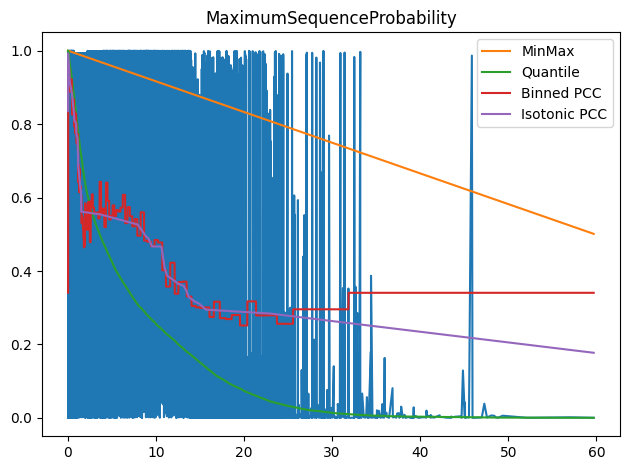

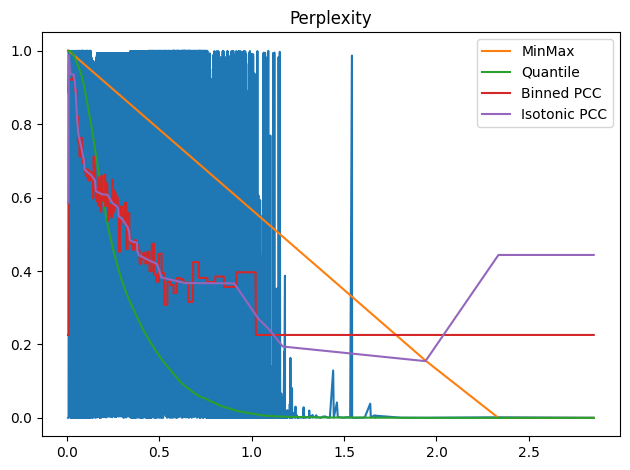

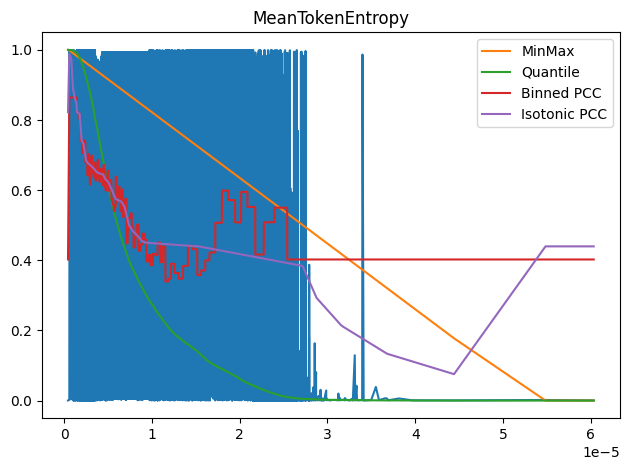

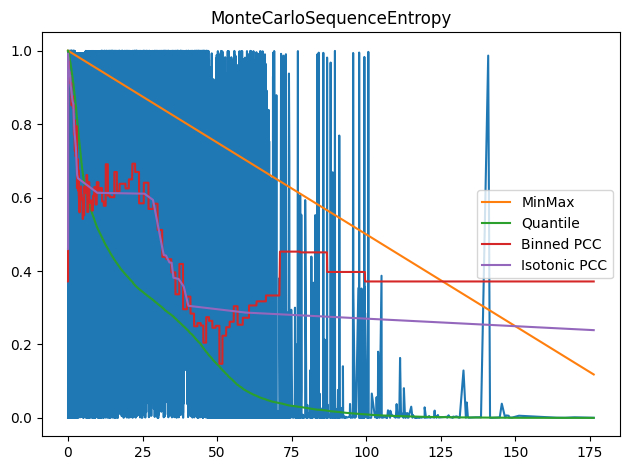

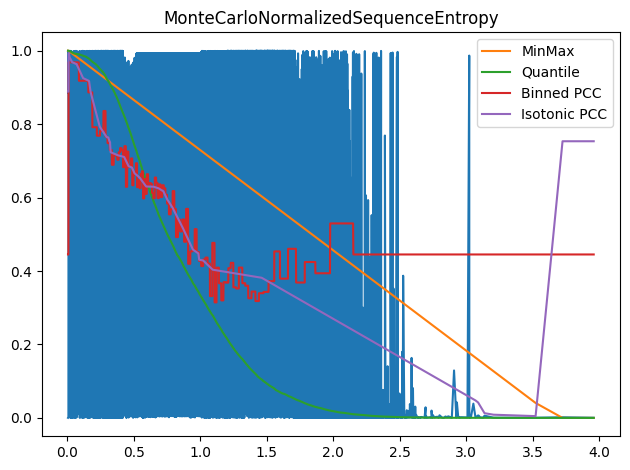

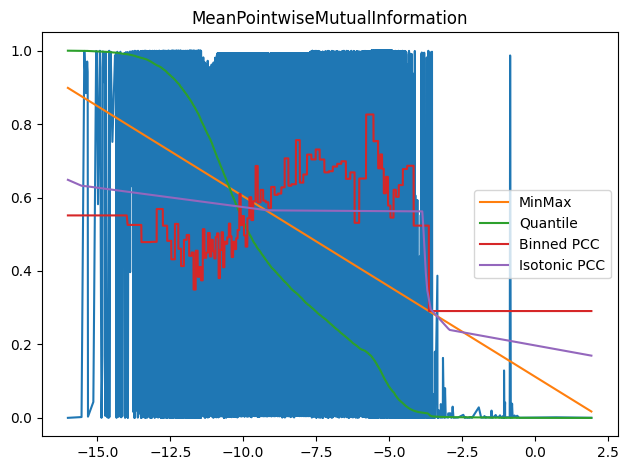

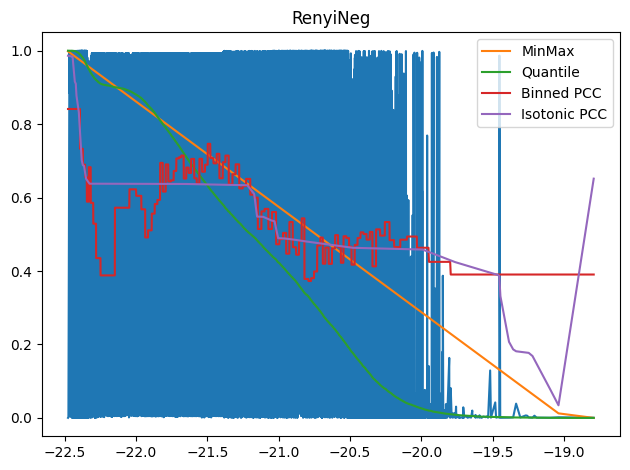

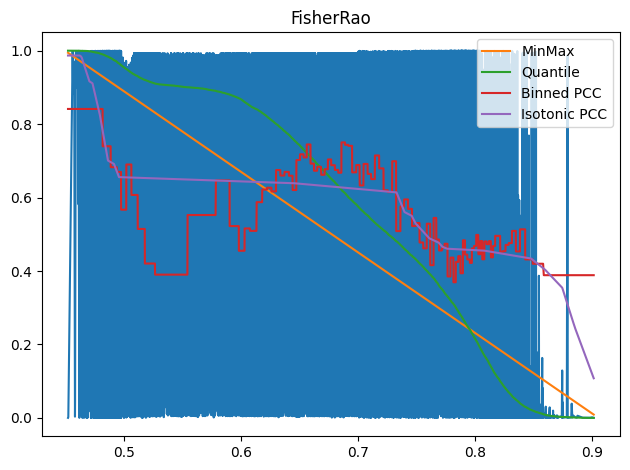

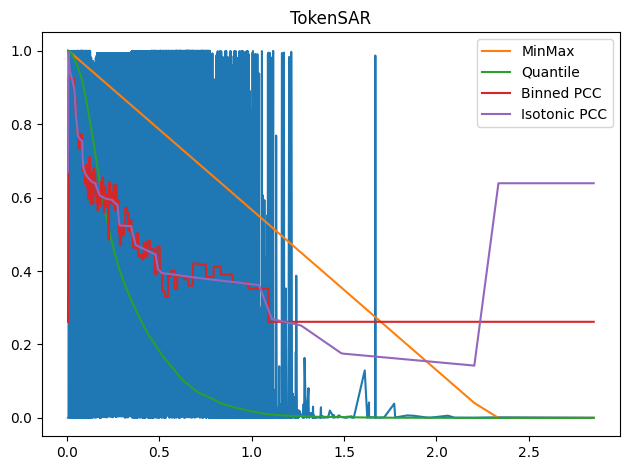

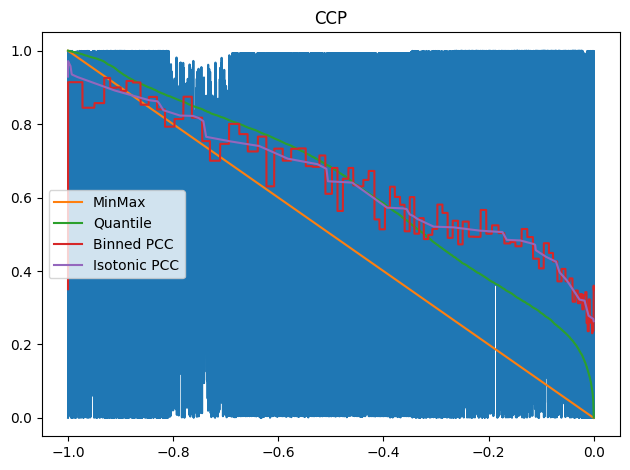

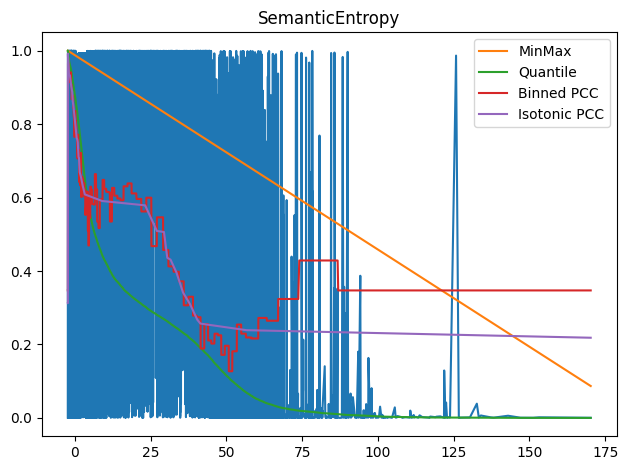

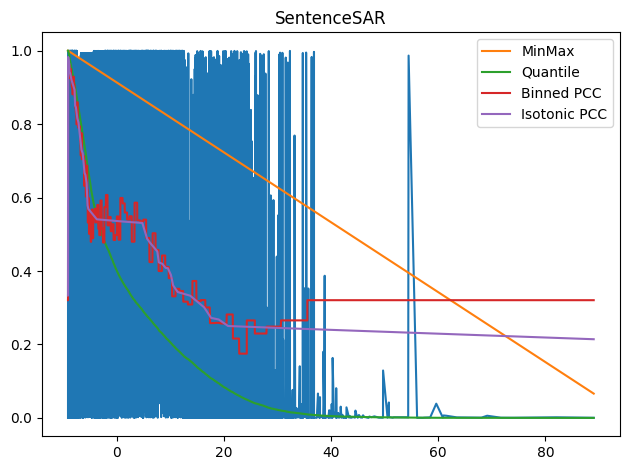

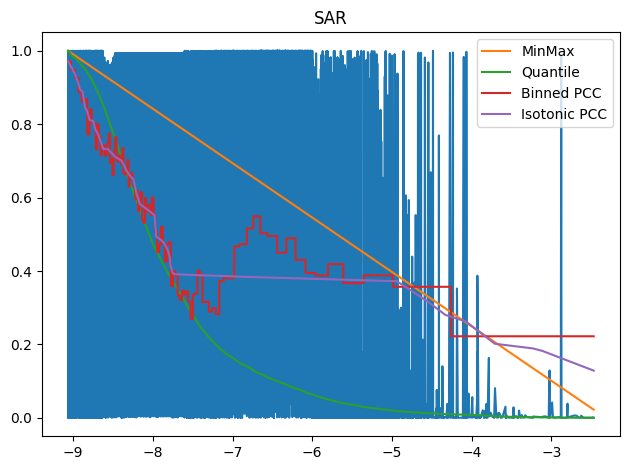

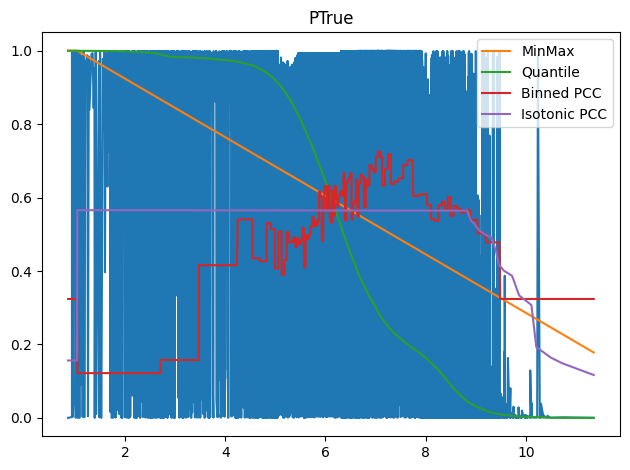

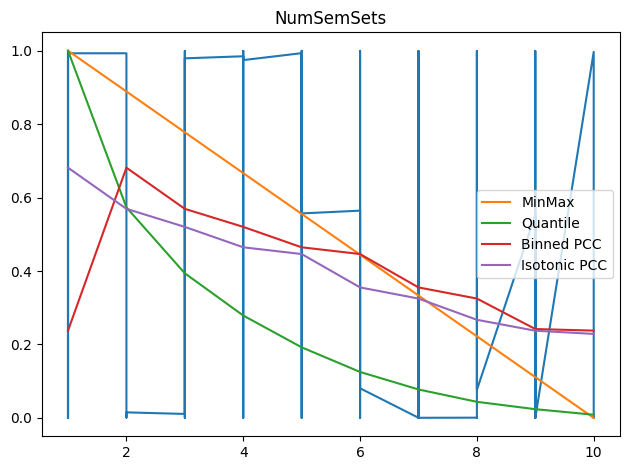

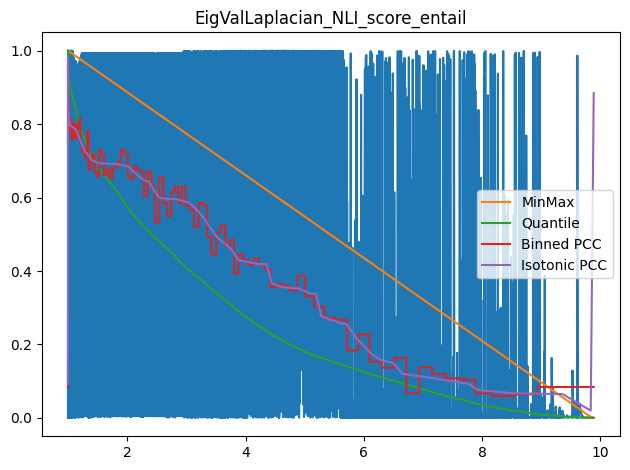

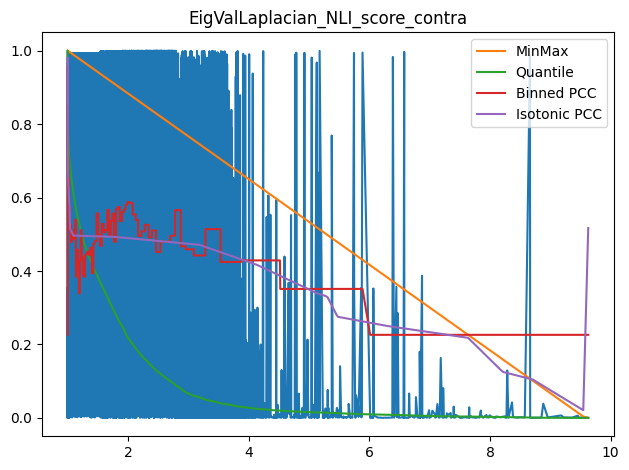

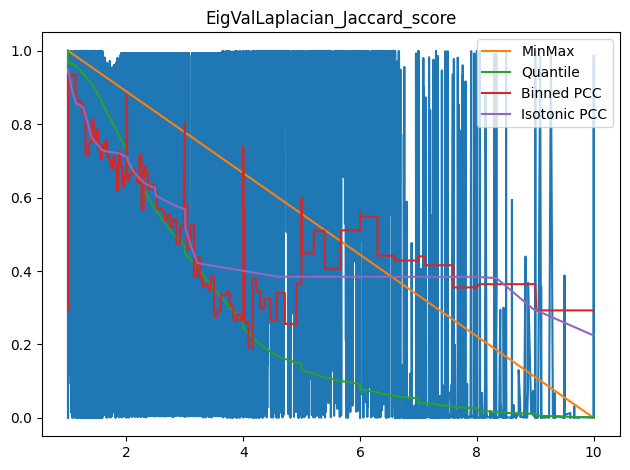

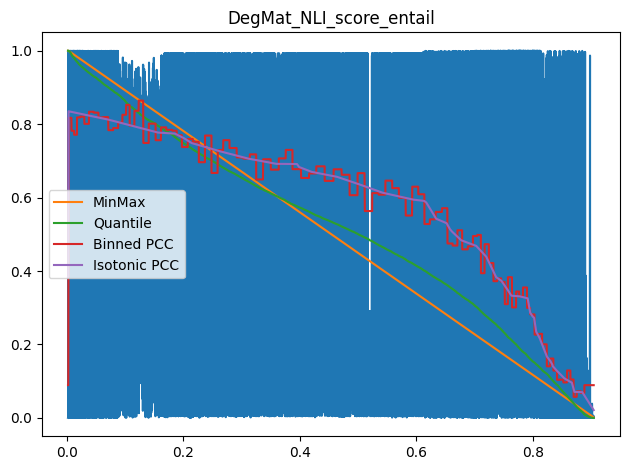

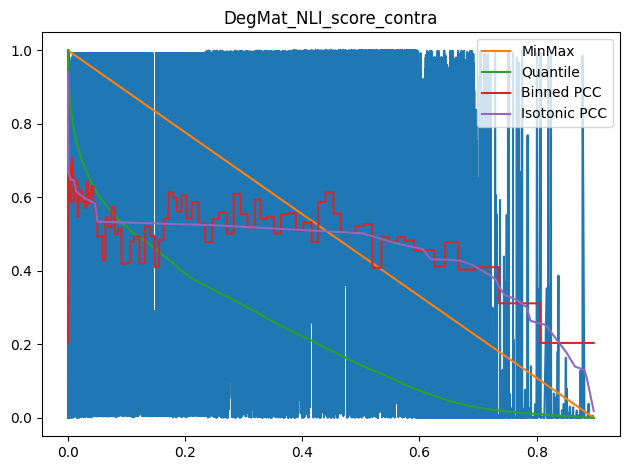

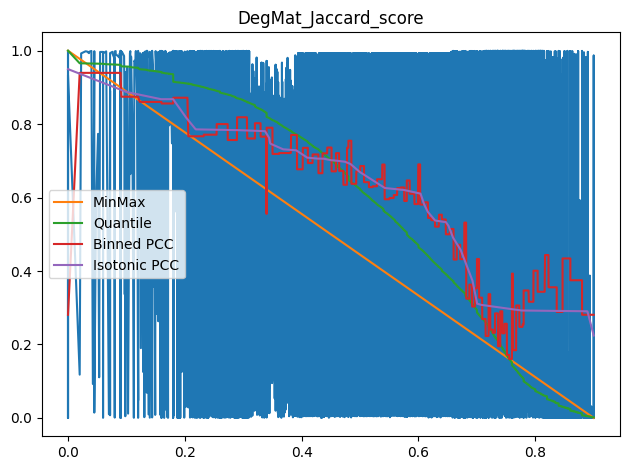

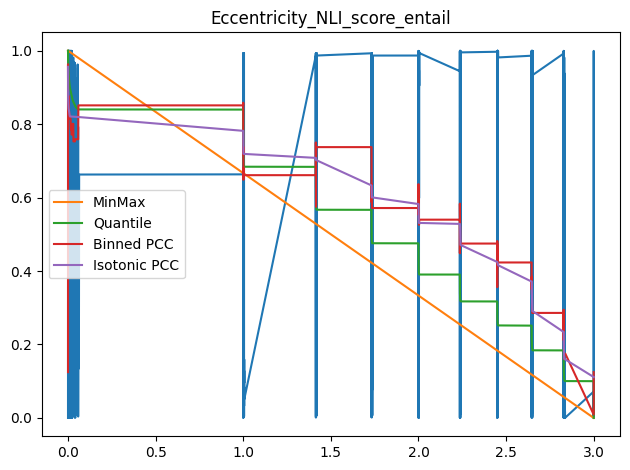

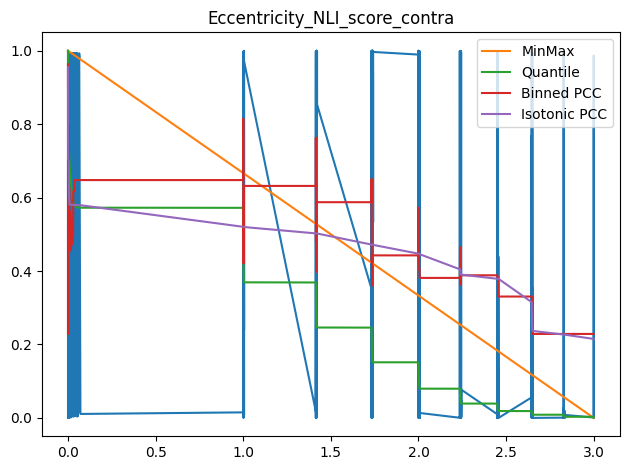

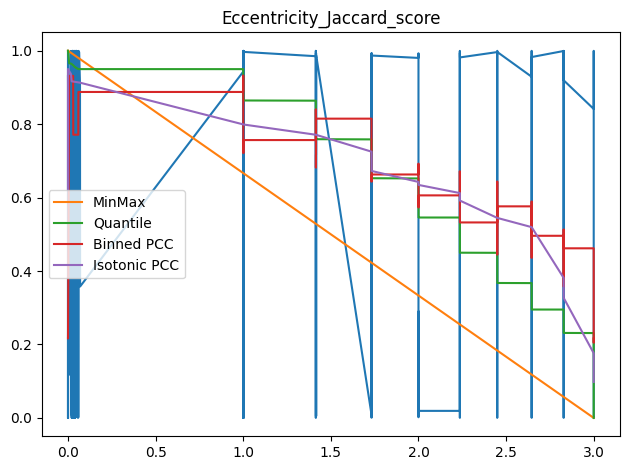

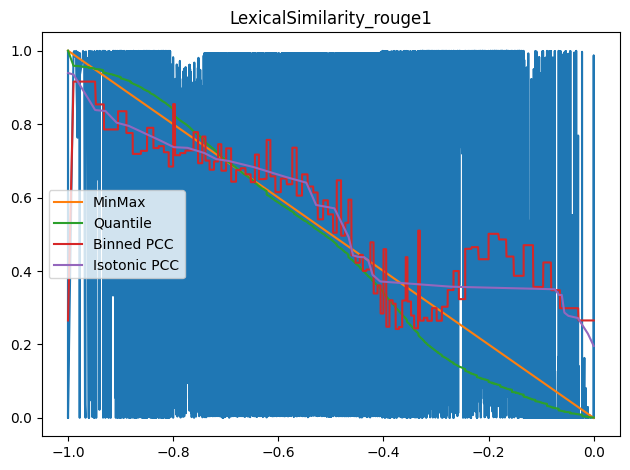

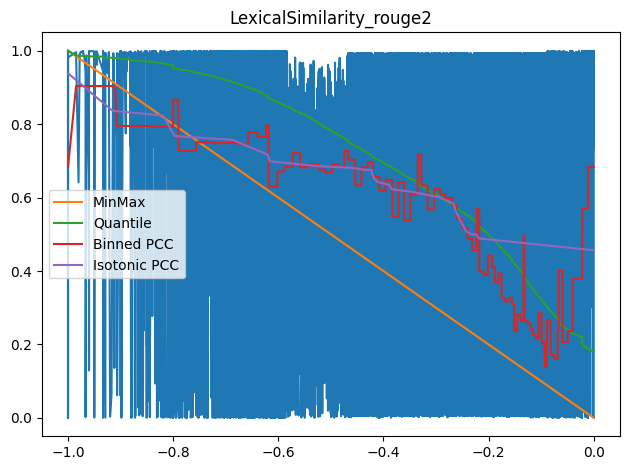

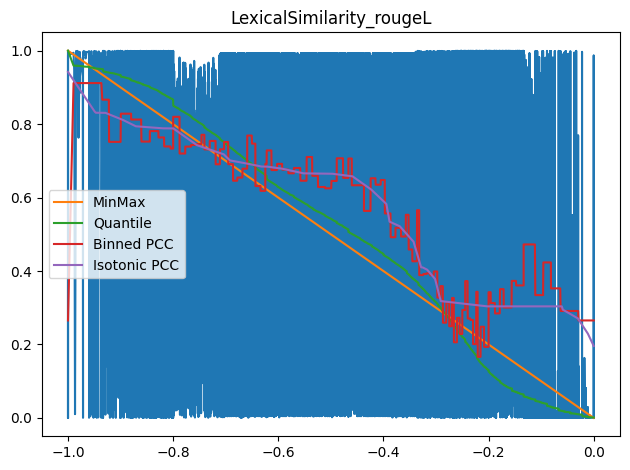

<Figure size 640x480 with 0 Axes>

In [18]:
for method in UE_METHOD_NAMES:
    metric = 'AlignScore'
    cur_ues = all_ues[method]
    order = np.argsort(cur_ues)
    sor_ues = cur_ues[order]
    sor_metrics = all_gen_metrics[metric]
    plt.plot(sor_ues, sor_metrics)
    plt.plot(sor_ues, confidences['min_max'][metric][method][order], label='MinMax')
    plt.plot(sor_ues, confidences['quantile'][metric][method][order], label='Quantile')
    plt.plot(sor_ues, confidences['binned_pcc'][metric][method][order], label='Binned PCC')
    plt.plot(sor_ues, confidences['isotonic_pcc'][metric][method][order], label='Isotonic PCC')
    plt.title(method)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.clf()